In [48]:
# from google.colab import drive
# drive.mount('/content/drive')


In [81]:
## Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Numpy
import numpy as np


## Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest # new!




## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import zscore
from sklearn.decomposition import PCA




## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [50]:
#Load Boston Housing Data
fpath = '/content/drive/MyDrive/CodingDojo/03-IntermediateMachineLearning/Week10/Data/credit_card.csv'
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10000 non-null  float64
 1   V2      10000 non-null  float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [53]:
## Scale the data
df_scaled = StandardScaler().fit_transform(df)


fitting KMeans with 2 clusters
fitting KMeans with 3 clusters
fitting KMeans with 4 clusters
fitting KMeans with 5 clusters
fitting KMeans with 6 clusters
fitting KMeans with 7 clusters
fitting KMeans with 8 clusters
fitting KMeans with 9 clusters
fitting KMeans with 10 clusters


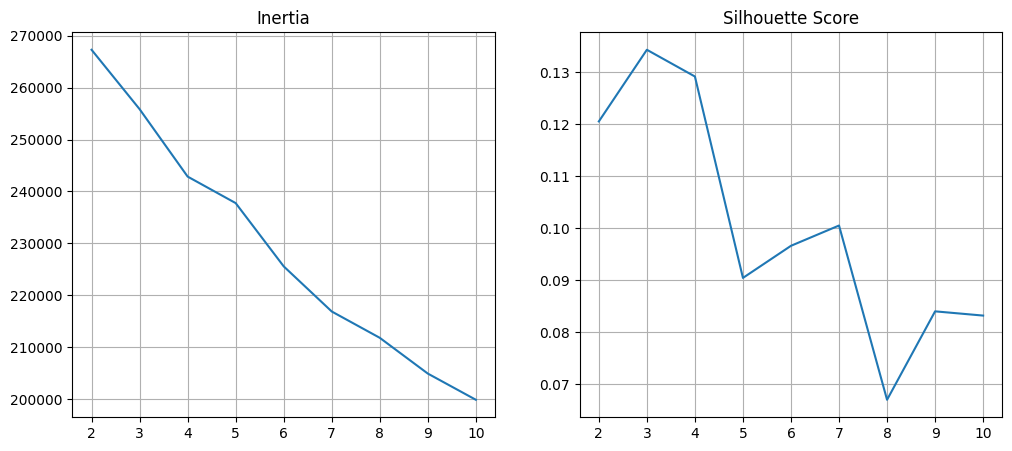

In [63]:
## Create a range of k numbers of clusters
ks = range(2,11)

## Create lists to hold the inertia and silhouette scores
inertias = []
sils = []

## Loop over k values to determine the best number of clusters for the model
for k in ks:
    ## create and fit a KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_scaled)
    print(f'fitting KMeans with {k} clusters')

    ## Append the inertia and silhouette scores to the lists
    inertias.append(kmeans.inertia_)
    sils.append(silhouette_score(df_scaled, kmeans.labels_))

## Plot the inertias and silhouette scores to determine the right number of clusters
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].plot(ks, inertias)
axes[0].grid()
axes[0].set_title('Inertia')

axes[1].plot(ks, sils)
axes[1].set_title('Silhouette Score')
axes[1].grid()

In [64]:
# Instantiate KMeans
from sklearn.cluster import KMeans
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=3, n_init=10, random_state = 42)
kmeans.fit(X)




KMeans(n_clusters=3, n_init=10, random_state=42)

In [65]:
## Find distances
from scipy.spatial.distance import cdist

fitting KMeans with 2 clusters
fitting KMeans with 3 clusters
fitting KMeans with 4 clusters
fitting KMeans with 5 clusters
fitting KMeans with 6 clusters
fitting KMeans with 7 clusters
fitting KMeans with 8 clusters
fitting KMeans with 9 clusters
fitting KMeans with 10 clusters


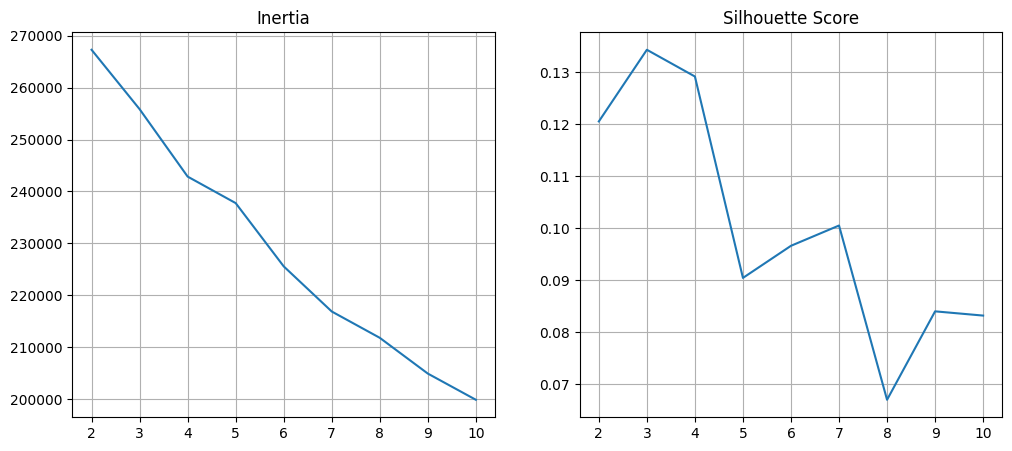

In [69]:
## Create a range of k numbers of clusters
ks = range(2,11)

## Create lists to hold the inertia and silhouette scores
inertias = []
sils = []

## Loop over k values to determine the best number of clusters for the model
for k in ks:
    ## create and fit a KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_scaled)
    print(f'fitting KMeans with {k} clusters')

    ## Append the inertia and silhouette scores to the lists
    inertias.append(kmeans.inertia_)
    sils.append(silhouette_score(df_scaled, kmeans.labels_))

## Plot the inertias and silhouette scores to determine the right number of clusters
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].plot(ks, inertias)
axes[0].grid()
axes[0].set_title('Inertia')

axes[1].plot(ks, sils)
axes[1].set_title('Silhouette Score')
axes[1].grid()

In [71]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(df_scaled)



In [72]:
## Find distances
from scipy.spatial.distance import cdist

In [73]:
# Find the minimum distance to a cluster center for each data point.
distances = cdist(df_scaled, kmeans.cluster_centers_, 'euclidean')
distances[:5]

array([[ 4.23584206,  5.8546939 ,  8.75444184,  2.77192954,  4.86473574,
        14.43182996, 21.13112736],
       [ 4.12561849,  5.05764444,  8.99882243,  2.43210245,  3.53807441,
        13.9691375 , 20.33488936],
       [ 7.17498556,  8.6538659 , 10.56473182,  6.54157502,  7.69825684,
        15.64087925, 21.54781395],
       [ 5.65742186,  6.86082988,  9.94966051,  4.71624951,  5.92945683,
        14.69614419, 21.22029282],
       [ 4.26857257,  6.13120581,  7.9643655 ,  3.26222763,  5.03035362,
        14.55977595, 20.91760804]])

In [74]:
min_distances = np.min(distances, axis=1)
min_distances[:5]

array([2.77192954, 2.43210245, 6.54157502, 4.71624951, 3.26222763])

In [75]:
## Determine 99.7th percentile distance threshold
threshold = np.percentile(min_distances, 99.7)
threshold

20.275398080912975

Isolation Forest

In [78]:
## Import IsolationForest
from sklearn.ensemble import IsolationForest

## As a tree-based model, the data does not need to be scaled.
## Set contamination to .003
iso = IsolationForest(contamination=.003, random_state=42)

iso.fit(df)
##Make predictons
predictions = iso.predict(df)
predictions[:5]





/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1])

In [79]:
## Create a filter
iso_filter = predictions == -1
iso_filter

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [93]:
## Create a filter for which data points are outside the distance threshold
kmeans_filter = min_distances > threshold
kmeans_filter




array([False, False, False, ..., False, False, False])

Compare the list of anomalies from KMeans and Isolation Forest

In [83]:
iso_filter.sum()



1

In [91]:
kmeans_filter.sum()



30

In [96]:
## What percent of the data do the models agree are anomalous?

## Find where models agree on an anomaly
agree_filter = iso_filter.sum() + kmeans_filter.sum()
agree_filter.sum()



31